In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the file
df = pd.read_csv("CAERS_ASCII_2004_2017Q2.csv")
df.head()

,RA_Report #,RA_CAERS Created Date,AEC_Event Start Date,PRI_Product Role,PRI_Reported Brand/Product Name,PRI_FDA Industry Code,PRI_FDA Industry Name,CI_Age at Adverse Event,CI_Age Unit,CI_Gender,AEC_One Row Outcomes,SYM_One Row Coded Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
2,65333,1/1/2004,NaN,Suspect,KROGER CLASSIC CREAM-DE-MINT CANDY MINT CHIP I...,13,Ice Cream Prod,NaN,Not Available,Female,VISITED AN ER,"NAUSEA, DYSGEUSIA, DIARRHOEA"
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
4,65336,1/1/2004,NaN,Suspect,ENFIMIL LIPIL BABY FORMULA,40,Baby Food Prod,NaN,Not Available,Not Available,VISITED A HEALTH CARE PROVIDER,"GASTROINTESTINAL DISORDER, PHYSICAL EXAMINATION"


In [3]:
# Renaming columns and dropping null values
df = df.rename(columns = {
    'SYM_One Row Coded Symptoms': 'Symptoms',
    'AEC_One Row Outcomes': 'Outcomes',
    'CI_Gender': 'Gender',
    'CI_Age Unit': 'Age',
    'CI_Age at Adverse Event': 'Age_at_event',
    'PRI_FDA Industry Name': 'Industry',
    'PRI_FDA Industry Code': 'Industry_code',
    'PRI_Reported Brand/Product Name': 'Product_name', 
    'PRI_Product Role': 'Product_role', 
    'AEC_Event Start Date': 'Reported_date', 
    'RA_CAERS Created Date': 'Entered_date', 
    'RA_Report #': 'ID'
}).dropna()

df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age_at_event,Age,Gender,Outcomes,Symptoms
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL..."
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Year(s),Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL..."
3,65335,1/1/2004,11/24/2003,Suspect,ENFAMIL LIPIL BABY FORMULA,40,Baby Food Prod,3.0,Month(s),Not Available,NON-SERIOUS INJURIES/ ILLNESS,"GASTROINTESTINAL DISORDER, VOMITING"
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Year(s),Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Year(s),Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH"


In [4]:
df.groupby('Age')['Age_at_event'].agg('count').head()

Age
Day(s)           128
Decade(s)          1
Month(s)         928
Not Available      9
Week(s)          135
Name: Age_at_event, dtype: int64

In [5]:
df['Age'].value_counts()

Year(s)          34227
Month(s)           928
Week(s)            135
Day(s)             128
Not Available        9
Decade(s)            1
Name: Age, dtype: int64

In [6]:
def compute_age(x):
  time_measurements = {
        'Year(s)': 1,
        'Month(s)': 1/12, 
        'Week(s)': 1/52, 
        'Day(s)': 1/365, 
        'Not Available': 0,
        'Decade(s)': 10
    }
  return x['Age_at_event'] * time_measurements[x['Age']]

In [7]:
df['Age'] = df.apply(compute_age, axis=1)

In [8]:
df = df.drop(columns='Age_at_event')

In [9]:
df = df[df['Age']!=0]

In [10]:
df['Symptoms_list'] = df['Symptoms'].map(lambda x: x.split(', '))

In [11]:
df['Outcomes_list'] = df['Outcomes'].map(lambda x: x.split(', '))

In [12]:
df = df[df['Gender']!='Not Available']

In [13]:
len(df)

34595

In [14]:
df[1:15]

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age,Gender,Outcomes,Symptoms,Symptoms_list,Outcomes_list
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...","[SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITA...","[VISITED AN ER, VISITED A HEALTH CARE PROVIDER..."
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,[CHOKING],[NON-SERIOUS INJURIES/ ILLNESS]
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH","[COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH]",[DEATH]
17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE","[DEATH, MITRAL VALVE INCOMPETENCE]",[DEATH]
18,65403,1/5/2004,3/4/2003,Suspect,METABOLIFE METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),54.0,Female,"LIFE THREATENING, HOSPITALIZATION",CEREBROVASCULAR ACCIDENT,[CEREBROVASCULAR ACCIDENT],"[LIFE THREATENING, HOSPITALIZATION]"
20,65416,1/6/2004,11/15/2003,Suspect,AVLIMIL,54,Vit/Min/Prot/Unconv Diet(Human/Animal),36.0,Female,VISITED A HEALTH CARE PROVIDER,"HEART RATE INCREASED, DIZZINESS, BLOOD PRESSUR...","[HEART RATE INCREASED, DIZZINESS, BLOOD PRESSU...",[VISITED A HEALTH CARE PROVIDER]
22,65420,1/6/2004,11/1/2003,Suspect,COFFEE,31,Coffee/Tea,33.0,Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS...","[PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALI...","[LIFE THREATENING, DISABILITY]"
23,65420,1/6/2004,11/1/2003,Suspect,DIET CAFFEINE FREE COKE,29,Soft Drink/Water,33.0,Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS...","[PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALI...","[LIFE THREATENING, DISABILITY]"
24,65420,1/6/2004,11/1/2003,Suspect,DIET COKE,29,Soft Drink/Water,33.0,Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS...","[PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALI...","[LIFE THREATENING, DISABILITY]"
25,65420,1/6/2004,11/1/2003,Suspect,DIET PEPSI,29,Soft Drink/Water,33.0,Male,"LIFE THREATENING, DISABILITY","PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALIS...","[PARAESTHESIA, PHYSICAL EXAMINATION, HOSPITALI...","[LIFE THREATENING, DISABILITY]"


In [15]:
df['Product_name'].value_counts()

REDACTED                                                          603
VITAMIN D                                                         412
MULTIVITAMIN                                                      393
FISH OIL                                                          318
CALCIUM                                                           314
                                                                 ... 
OSTEO BI FLEX GLUCOSAMINE CHONDROITIN MSM WITH 5 LOXIN CAPLETS      1
BIGEN ORIENTAL BLACK HAIR DYE                                       1
NEUROTRIM                                                           1
MASS COMPLEX                                                        1
SUPERIOR PREFERENCE HAIR COLORING                                   1
Name: Product_name, Length: 20460, dtype: int64

In [16]:
concat_outcomes = pd.Series([item for sublist in list(df['Outcomes_list']) for item in sublist])
print(concat_outcomes.drop_duplicates())

0                                   VISITED AN ER
1                  VISITED A HEALTH CARE PROVIDER
2       REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.
3                                 HOSPITALIZATION
8                   NON-SERIOUS INJURIES/ ILLNESS
9                                           DEATH
11                               LIFE THREATENING
15                                     DISABILITY
170                     SERIOUS INJURIES/ ILLNESS
247                            CONGENITAL ANOMALY
2626     OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)
4733                                         NONE
dtype: object


In [17]:
outcomes_list_serious = ['REQ. INTERVENTION TO PRVNT PERM. IMPRMNT.', 'HOSPITALIZATION', 'DEATH', 'LIFE THREATENING', 'DISABILITY', 'SERIOUS INJURIES/ ILLNESS', 'CONGENITAL ANOMALY', 'OTHER SERIOUS (IMPORTANT MEDICAL EVENTS)']
outcomes_list_nonserious = ['VISITED AN ER', 'VISITED A HEALTH CARE PROVIDER', 'NON-SERIOUS INJURIES/ ILLNESS', 'NONE']

In [18]:
df['Outcomes_bool'] = df['Outcomes_list'].map(lambda x:1 if len(set(outcomes_list_serious) & set(x)) >= 1 else 0)
df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age,Gender,Outcomes,Symptoms,Symptoms_list,Outcomes_list,Outcomes_bool
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...","[SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITA...","[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...",1
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...","[SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITA...","[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...",1
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,[CHOKING],[NON-SERIOUS INJURIES/ ILLNESS],0
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH","[COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH]",[DEATH],1
17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE","[DEATH, MITRAL VALVE INCOMPETENCE]",[DEATH],1


In [19]:
df['Date_range'] = (pd.to_datetime(df['Entered_date']) - pd.to_datetime(df['Reported_date'])).dt.days
df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age,Gender,Outcomes,Symptoms,Symptoms_list,Outcomes_list,Outcomes_bool,Date_range
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...","[SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITA...","[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...",1,150
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...","[SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITA...","[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...",1,150
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,[CHOKING],[NON-SERIOUS INJURIES/ ILLNESS],0,11
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH","[COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH]",[DEATH],1,44
17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE","[DEATH, MITRAL VALVE INCOMPETENCE]",[DEATH],1,852


In [20]:
df = df[df['Gender'].map(lambda x: x not in ['Unknown', 'Not Reported'])]

In [21]:
df['Gender'].value_counts()

Female    23052
Male      11541
Name: Gender, dtype: int64

In [22]:
df2 = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
df2.head()

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [23]:
pd.get_dummies(df2, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [24]:
concat_symptoms = pd.Series([item for sublist in list(df['Symptoms_list']) for item in sublist])
len(concat_symptoms.drop_duplicates().sort_values())

3076

<AxesSubplot:>

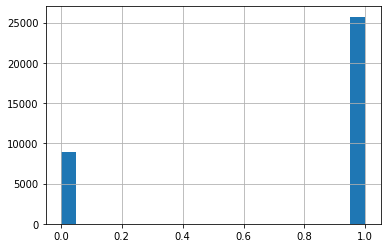

In [25]:
df['Outcomes_bool'].hist(bins=20)

In [26]:
df['Outcomes_bool'].value_counts()

1    25720
0     8873
Name: Outcomes_bool, dtype: int64

In [27]:
baseline_acc = 25720/(25720+8873)
baseline_acc

0.743503020842367

In [28]:
# Don't create new column for intercept in dmatrices for logistic reg with scikit learn

# How do we encode all the features?


(0.0, 6000.0, -1.0, 2.0)

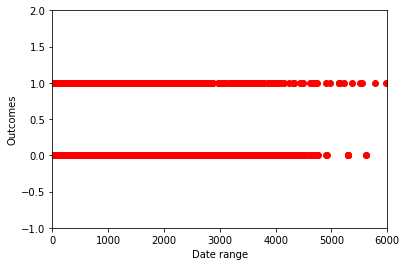

In [29]:
# Is a higher date range indicative of less danger?
plt.plot(df['Date_range'], df['Outcomes_bool'], 'ro')
plt.xlabel('Date range')
plt.ylabel('Outcomes')
plt.axis([0, 6000, -1, 2])
# From the plot, no

<AxesSubplot:>

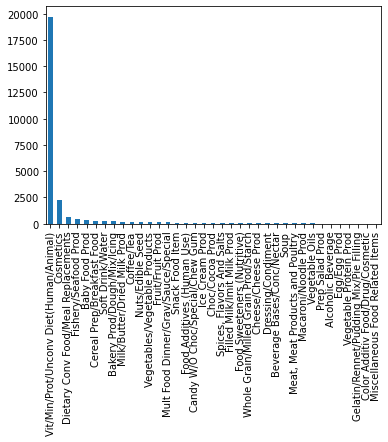

In [30]:
# Which industries are most responsible for an outcome bool of one?
df[df['Outcomes_bool']==1]['Industry'].value_counts().plot(kind='bar')
# On an absolute basis, Vitamins/minerals/protein seem to be the most responsible.

In [31]:
# Is age related to outcome?
# df['Gender'].value_counts().plot(kind='bar')
# plt.plot(df['Age'], df['Outcomes_bool'], 'ro')
# plt.xlabel('Age')
# plt.ylabel('Outcome')
# plt.axis([0, 100, -1, 2])
# From the plot, NO

Female    17279
Male       8441
Name: Gender, dtype: int64


<AxesSubplot:>

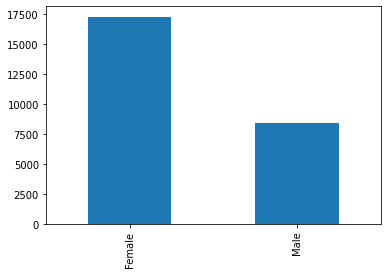

In [32]:
# Is gender related to outcome?
print(df[df['Outcomes_bool']==1]['Gender'].value_counts())
df[df['Outcomes_bool']==1]['Gender'].value_counts().plot(kind='bar')
# There are twice as many dangerous cases for females than males.

In [33]:
# Suspect vs concomitant
df['Product_role'].value_counts()
# Most products are suspected to be responsible for the reaction

Suspect        25987
Concomitant     8606
Name: Product_role, dtype: int64

In [34]:
df.head()

,ID,Entered_date,Reported_date,Product_role,Product_name,Industry_code,Industry,Age,Gender,Outcomes,Symptoms,Symptoms_list,Outcomes_list,Outcomes_bool,Date_range
0,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITAL...","[SWELLING FACE, RASH, WHEEZING, COUGH, HOSPITA...","[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...",1,150
1,65325,1/1/2004,8/4/2003,Suspect,MIDWEST COUNTRY FAIR CHOCOLATE FLAVORED CHIPS,3,Bakery Prod/Dough/Mix/Icing,2.0,Female,"VISITED AN ER, VISITED A HEALTH CARE PROVIDER,...","SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITAL...","[SWELLING FACE, WHEEZING, COUGH, RASH, HOSPITA...","[VISITED AN ER, VISITED A HEALTH CARE PROVIDER...",1,150
5,65345,1/1/2004,12/21/2003,Suspect,"FRITO LAY FUNYUNS ONION FLAVOR, ONION RINGS",7,Snack Food Item,10.0,Male,NON-SERIOUS INJURIES/ ILLNESS,CHOKING,[CHOKING],[NON-SERIOUS INJURIES/ ILLNESS],0,11
16,65399,1/5/2004,11/22/2003,Suspect,METOBOLITE 356,54,Vit/Min/Prot/Unconv Diet(Human/Animal),51.0,Male,DEATH,"COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH","[COMPLETED SUICIDE, STRESS SYMPTOMS, DEATH]",[DEATH],1,44
17,65400,1/5/2004,9/5/2001,Suspect,METABOLIFE,54,Vit/Min/Prot/Unconv Diet(Human/Animal),45.0,Female,DEATH,"DEATH, MITRAL VALVE INCOMPETENCE","[DEATH, MITRAL VALVE INCOMPETENCE]",[DEATH],1,852
